In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup

import time

import privarcy as pr

In [101]:
ser = Service('./chromedriver.exe')
driver = webdriver.Chrome(service = ser)

In [102]:
url = 'https://www.instagram.com/'
driver.get(url)
time.sleep(3)

## 인스타그램 검색결과 url 만들어서 접속

In [103]:
def insta_searching(word):
    url = 'https://www.instagram.com/explore/tags/' + word
    
    return url

In [104]:
word = '제주도맛집'
url = insta_searching(word)
driver.get(url)
time.sleep(3)

### 첫 번째 게시글 열기

In [112]:
# 페이지의 클릭동작을 하는 코드
from selenium.webdriver.common.by import By

def select_first(driver):
    first = driver.find_element(By.CSS_SELECTOR, "div._9AhH0")
    first.click()
    time.sleep(3)

select_first(driver)

In [113]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [114]:
import unicodedata

contents = soup.select('div.C4VMK > span')[1].text
contents = unicodedata.normalize('NFC', contents)

contents

IndexError: list index out of range

In [115]:
text= soup.select('div.C4VMK > span')[0].text
text

IndexError: list index out of range

In [116]:
import re

tags = re.findall(r'#[^\sw#,\\]+', contents)
tags

[]

In [117]:
date = soup.select('time.FH9sR.RhOlS.Nzb55')[0]['datetime'][0:10]
date

IndexError: list index out of range

In [118]:
like = soup.select('a.zV_Nj > span')[0].text
like

IndexError: list index out of range

In [119]:
place = soup.select('div.M30cS')[0].text
place

IndexError: list index out of range

In [120]:
def get_content(driver):
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    try:
        content = soup.select('div.C4VMK > span')[0].text
        content = unicodedata.normalize('NFC', content) 
    except:
        content = ' '
        
    tags = re.findall(r'#[^\s#,\\]+', content)  
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    
    try:
        like = soup.select('div.Nm9Fw > a.zV_Nj > span').text
    except:
        like = 0
        
    try: 
        place = soup.select('div.M30cS')[0].text
        place = unicodedata.normalize('NFC', place)
    except:
        place = ''
        
    data = [content, date, like, place, tags]
    return data

get_content(driver)

IndexError: list index out of range

In [ ]:
def move_next(driver):

    right = driver.find_element(By.CSS_SELECTOR, 'div.l8mY4.feth3')
    right.click()
    time.sleep(3)

move_next(driver)

In [111]:
temp = []
for i in range(10) :
    temp.append(get_content(driver))
    move_next(driver)

IndexError: list index out of range

In [121]:
for i in range(len(temp)):
    print(temp[i])
    print('-------------',len(temp[i]),'-----------')
    print('----------------------------------------')

## 위 과정을 자동으로 해주는 함수를 만들어 보자!!
- 웹 드라이버가 띄워져 있다는 가정하에 간단히 해보도록 하자!

In [99]:
## 페이지 수를 파라맘니터로 받아 for 문을 돌려 뽑아 내도록했다.
def insta_crawling(page):
    results = []
    for i in range(10) :
        results.append(get_content(driver))
        move_next(driver)
    return results

print(insta_crawling(10))

IndexError: list index out of range

In [108]:
ser = Service('./chromedriver.exe')

driver = webdriver.Chrome(service=ser)
time.sleep(2)

In [122]:
def insta_crawling(word, n):
    url = insta_searching(word)
    
    driver.get(url)
    time.sleep(5)
    
    select_first(driver)
    time.sleep(5)
    
    
#     target = n
    results = []
    
    for i in range(n):
        try:
            data = get_content(driver)
            results.append(data)
            move_next(driver)
            
        except:
            time.sleep(2)
            move_next(driver)
            
    return(results)


In [123]:
result_1 = insta_crawling('제주도맛집', 20)

In [124]:
result_1

[['제주 애월에 위치한 현지인들의 추천 맛집 #jival 사장님이 직접 요리하시는 애월읍 대표하는 레스토랑싱싱한 해산물과 파스타의 만남 수제로 만드시는 사장님의 정성까지 더해져 제주 여행시 꼭 들려야 하는 맛집 중의 맛집바다를 보며 즐기는 식사......주소 : 제주 제주시 애월읍 애월해안로 212예약 : 0507-1485-5050#애월맛집 #애월맛집추천 #제주맛집 #제주맛집추천 #제주도맛집 #제주도여행 #제주여행코스추천 #제주맛집코스 #애월맛집코스 #크림파스타 #제주공항근처맛집',
  '2022-01-16',
  0,
  'JIVAL',
  ['#jival',
   '#애월맛집',
   '#애월맛집추천',
   '#제주맛집',
   '#제주맛집추천',
   '#제주도맛집',
   '#제주도여행',
   '#제주여행코스추천',
   '#제주맛집코스',
   '#애월맛집코스',
   '#크림파스타',
   '#제주공항근처맛집']],
 ['..#동백식당#갈비살#한라산..일을 열심히 했으니 ㅎㅎ한잔 적셔줘야죠?😍😍집근처  고깃집ㅎㅎ아부지.어머니.친구랑 나푸짐하게 먹어봅시다ㅋ아부지 계셔서 사진을 못찍겠어🤣🤣🤣🤣🤣🤣🤣대충 한장만 찍고..아부지랑 짠...친구는 제주시로 가야하니.ㅋ술 못먹고ㅋㅋ오늘은 아부지랑 짠짠✌✌..#제주도 #제주도맛집#서귀포맛집 #한라봉#친구#홈파티#요리사#참이슬#korea#플레이팅#맛집#안주#수원#수원맛집#먹방#소주#요리#술스타그램#요리스타그램#재희포차#온더테이블#대구맛집#부산맛집#제주도맛집#요리하는남자#레시피테러리스트',
  '2022-01-16',
  0,
  'Seogwipo',
  ['#동백식당',
   '#갈비살',
   '#한라산..일을',
   '#제주도',
   '#제주도맛집',
   '#서귀포맛집',
   '#한라봉',
   '#친구',
   '#홈파티',
   '#요리사',
   '#참이슬',
   '#korea',
   '#플레이팅',
   '#맛집',
   '#안주',
   '#수원',
   '#수원맛집',
   '#먹방',

In [125]:
jeju_insta_df = pd.DataFrame()
file_list = ['1_crawling_jejudoMatJip.xlsx', '1_crawling_jejudoGwanGwang.xlsx',
             '1_crawling_jejuMatJip.xlsx', '1_crawling_jejuYeoHang.xlsx']

for fname in file_list:
    fpath = './5_Jeju_Hotplace/files/' + fname
    temp = pd.read_excel(fpath)
    jeju_insta_df = jeju_insta_df.append(temp)

In [127]:
jeju_insta_df.shape

(12780, 5)

In [128]:
# 내용이 같으면 제거하라
jeju_insta_df.drop_duplicates(subset=['content'], inplace = True)
jeju_insta_df.shape

(8369, 5)

In [130]:
jeju_insta_df.to_excel('./my_files/jeju_no_duplicates.xlsx', index = False)

In [131]:
raw_total = jeju_insta_df.copy()

## 워드 클라우드 해보기

In [132]:
raw_total.columns

Index(['content', 'date', 'like', 'place', 'tags'], dtype='object')

In [134]:
raw_total['tags'][0]

0    ['#제주분식', '#제주맛집', '#제주도맛집', '#제주맛집추천', '#제주도맛...
0    ['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가...
0                                                   []
0                                             ['#제주도']
Name: tags, dtype: object

In [156]:
raw_total['tags'][0]

pandas.core.series.Series

In [157]:
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

In [158]:
tags_total

['#제주분식',
 '#제주맛집',
 '#제주도맛집',
 '#제주맛집추천',
 '#제주도맛집추천',
 '#제주도',
 '#제주맛집',
 '#용두암',
 '#신제주맛집',
 '#연동맛집',
 '#제주연동맛집',
 '#애월맛집',
 '#연동제주분식',
 '#제주공항근처맛집',
 '#제주공항맛집',
 '#돔베김밥',
 '#전복김밥',
 '#제주돈까스',
 '#jeju',
 '#제주도가볼만한곳',
 '#함덕맛집',
 '#제주도카페투어',
 '#제주일상',
 '#함덕',
 '#jejudo',
 '#jeju',
 '#제주도맛집',
 '#함덕맛집무거버거짱',
 '#일상',
 '#제주살이',
 '#제주도살이',
 '#함덕해수욕장',
 '#함덕카페',
 '#함덕맛집',
 '#제주카페',
 '#제주도카페',
 '#제주도맛집추천',
 '#제주도민',
 '#제주도민맛집',
 '#제주도맛집',
 '#제주맛집',
 '#제주도여행',
 '#동문시장',
 '#제주동문시장',
 '#제주도기념품',
 '#제주기념품',
 '#제주스는완벽',
 '#제주도맛집',
 '#제주맛집',
 '#제주도주스',
 '#제주도한라봉주스',
 '#제주도카페',
 '#제주카페',
 '#제주도기념품',
 '#제주기념품',
 '#제주감성소품',
 '#제주도여행',
 '#제주여행',
 '#2일차무거버거',
 '#제주도여행',
 '#제주맛집',
 '#함덕맛집',
 '#제주도버거',
 '#함덕해변',
 '#제주도맛집추천',
 '#제주도가볼만한곳',
 '#여행스타그램',
 '#제주도수제버거',
 '#제주여행',
 '#제주도카페',
 '#제주도맛집',
 '#조천읍',
 '#함덕맛집무거버거짱',
 '#조천카페',
 '#함덕해수욕장',
 '',
 '#제주마카롱',
 '#월정리카페콧수염',
 '#월정리맛집',
 '#월정리카페',
 '#월정리',
 '#구좌읍맛집',
 '#제주맛집',
 '#제주도맛집',
 '#함덕해수욕장',
 '#제주도민맛집',
 '#함덕맛집',
 '#성산맛집',
 '#구좌맛집',
 '#애월맛집',
 '#서귀포맛집',

In [166]:
# 빈도수를 집계해주는 함수
from collections import Counter

tags_counts = Counter(tags_total)
tags_counts

Counter({'#제주분식': 76,
         '#제주맛집': 3412,
         '#제주도맛집': 3149,
         '#제주맛집추천': 675,
         '#제주도맛집추천': 187,
         '#제주도': 2053,
         '#용두암': 18,
         '#신제주맛집': 157,
         '#연동맛집': 58,
         '#제주연동맛집': 14,
         '#애월맛집': 373,
         '#연동제주분식': 30,
         '#제주공항근처맛집': 231,
         '#제주공항맛집': 207,
         '#돔베김밥': 16,
         '#전복김밥': 84,
         '#제주돈까스': 14,
         '#jeju': 749,
         '#제주도가볼만한곳': 1014,
         '#함덕맛집': 97,
         '#제주도카페투어': 46,
         '#제주일상': 398,
         '#함덕': 54,
         '#jejudo': 191,
         '#함덕맛집무거버거짱': 15,
         '#일상': 701,
         '#제주살이': 480,
         '#제주도살이': 4,
         '#함덕해수욕장': 75,
         '#함덕카페': 28,
         '#제주카페': 600,
         '#제주도카페': 258,
         '#제주도민': 570,
         '#제주도민맛집': 477,
         '#제주도여행': 1454,
         '#동문시장': 46,
         '#제주동문시장': 35,
         '#제주도기념품': 50,
         '#제주기념품': 125,
         '#제주스는완벽': 12,
         '#제주도주스': 10,
         '#제주도한라봉주스': 10,
      

In [171]:
# 순서대로 50개를 뽑음
print(len(tags_counts.most_common()))
tags_counts.most_common(50)

19413


[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주도', 2053),
 ('#제주', 1538),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#jeju', 749),
 ('#일상', 701),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('', 587),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#선팔', 503),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#여행스타그램', 472),
 ('#제주반영구', 440),
 ('#제주도관광', 440),
 ('#여행', 436),
 ('#제주눈썹문신', 434),
 ('#서귀포눈썹문신', 420),
 ('#제주시', 419),
 ('#제주스타그램', 408),
 ('#눈썹문신', 405),
 ('#반영구', 405),
 ('#중문맛집', 404),
 ('#제주일상', 398),
 ('#제주속눈썹', 397)]

In [179]:
# 불용어 사전 생성
STOPWORDS = ['#일상', '#선팔', '#제주도', '#jeju', '#반영구', '#제주자연눈썹',
'#서귀포눈썹문신', '#제주눈썹문신', '#소통', '#맞팔', '#제주속눈썹', '#제주반영구',
            '#제주일상', '#여행', '#여행스타그램', '#눈썹문신', '#daily',
            '#카멜리아힐', '#제주메이크업', '#가족여행', '#서귀포반영구']

tag_total_selected = []

for tag in tags_total:
    if not tag in STOPWORDS:
        tag_total_selected.append(tag)
tag_total_selected = Counter(tag_total_selected)
tag_total_selected.most_common(50)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주', 1538),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('', 587),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#제주도관광', 440),
 ('#제주시', 419),
 ('#제주스타그램', 408),
 ('#중문맛집', 404),
 ('#먹스타그램', 395),
 ('#서귀포속눈썹', 395),
 ('#제주남자눈썹문신', 395),
 ('#서귀포자연눈썹', 395),
 ('#서귀포남자눈썹문신', 395),
 ('#중문흑돼지맛집', 377),
 ('#애월맛집', 373),
 ('#제주도여행코스', 350),
 ('#jejuisland', 343),
 ('#성산맛집', 316),
 ('#셀카', 313),
 ('#제주해안도로', 311),
 ('#제주시맛집', 311)]

In [177]:
import matplotlib.pyplot as plt
from matplotlib import rc
import sys
import seaborn as sns

rc('font', family = 'malgun gothic')

In [187]:
tag_count_df = pd.DataFrame(tag_total_selected.most_common(50))
tag_count_df.columns = ['tags', 'counts']
tag_count_df.head()

tag_count_df['tags'].replace('', None, inplace = True)
tag_count_df.dropna(subset = ['tags'], inplace =True)
tag_count_df.head()

,tags,counts
0,#제주맛집,3412
1,#제주도맛집,3149
2,#제주여행,3020
3,#제주관광,2827
4,#제주,1538


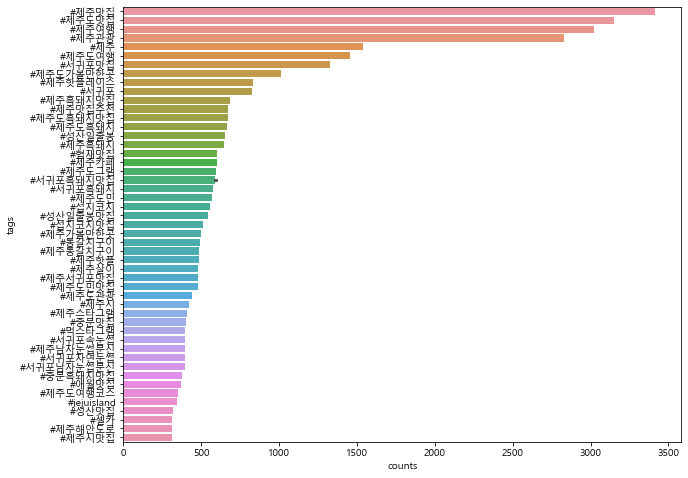

In [189]:
plt.figure(figsize = (10,8))
sns.barplot(x='counts', y='tags',
           data = tag_count_df)
plt.show()

In [190]:
! pip install wordcloud

(-0.5, 799.5, 399.5, -0.5)

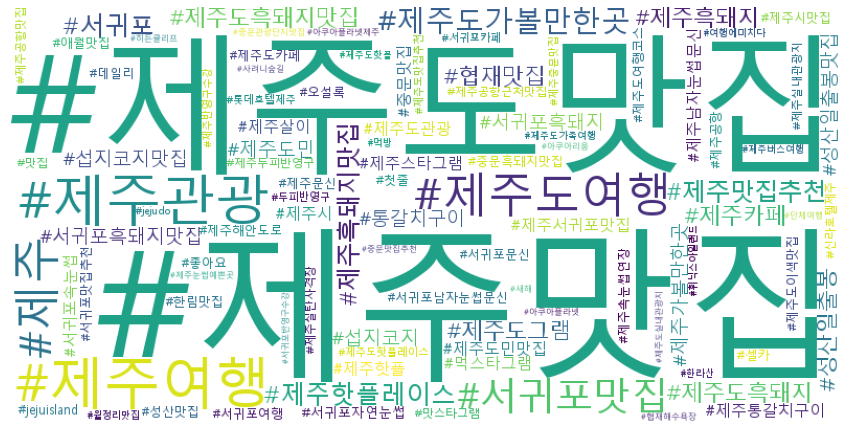

In [195]:
from wordcloud import WordCloud
import platform

if platform.system() == 'Windows':   #윈도우의 경우
    font_path = "c:/Windows/Fonts/malgun.ttf"

wordcloud=WordCloud(font_path= font_path, 
                    background_color="white",
                    max_words=100,
                    relative_scaling= 0.3,
                    width = 800,
                    height = 400
                 ).generate_from_frequencies(tag_total_selected)  
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')